In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [2]:
baseball_data = pd.read_csv("../project-1-team-5/Class Project DB.csv")

In [3]:
#Creating columns in this cell

#Creating a column for debut year

baseball_data["Debut Year"] = baseball_data["debut"].str[0:4].astype(float)

#Creating a column for domestic or international players

baseball_data.loc[(baseball_data["birthCountry"] == "USA"), "US_Born"] = "USA"

baseball_data.loc[(baseball_data["birthCountry"] != "USA"), "US_Born"] = "INTL"

#Creating a column for pitcher vs. non-pitchers

baseball_data.loc[(baseball_data["POS"] == "P"), "Pitcher_Pos"] = "Pitcher"

baseball_data.loc[(baseball_data["POS"] != "P"), "Pitcher_Pos"] = "Position Player"

#Creating a column for USA Regions based off of Census Bureau regions

#New England Region

baseball_data.loc[(baseball_data["birthState"] == "CT"), "US Region"] = "New England"
baseball_data.loc[(baseball_data["birthState"] == "ME"), "US Region"] = "New England"
baseball_data.loc[(baseball_data["birthState"] == "MA"), "US Region"] = "New England"
baseball_data.loc[(baseball_data["birthState"] == "NH"), "US Region"] = "New England"
baseball_data.loc[(baseball_data["birthState"] == "RI"), "US Region"] = "New England"
baseball_data.loc[(baseball_data["birthState"] == "VT"), "US Region"] = "New England"

#Mid-Atlantic Region

baseball_data.loc[(baseball_data["birthState"] == "NJ"), "US Region"] = "Mid-Atlantic"
baseball_data.loc[(baseball_data["birthState"] == "NY"), "US Region"] = "Mid-Atlantic"
baseball_data.loc[(baseball_data["birthState"] == "PA"), "US Region"] = "Mid-Atlantic"

#East North Central Region

baseball_data.loc[(baseball_data["birthState"] == "IL"), "US Region"] = "East North Central"
baseball_data.loc[(baseball_data["birthState"] == "IN"), "US Region"] = "East North Central"
baseball_data.loc[(baseball_data["birthState"] == "MI"), "US Region"] = "East North Central"
baseball_data.loc[(baseball_data["birthState"] == "OH"), "US Region"] = "East North Central"
baseball_data.loc[(baseball_data["birthState"] == "WI"), "US Region"] = "East North Central"

#West North Central Region

baseball_data.loc[(baseball_data["birthState"] == "IA"), "US Region"] = "West North Central"
baseball_data.loc[(baseball_data["birthState"] == "KS"), "US Region"] = "West North Central"
baseball_data.loc[(baseball_data["birthState"] == "MN"), "US Region"] = "West North Central"
baseball_data.loc[(baseball_data["birthState"] == "MO"), "US Region"] = "West North Central"
baseball_data.loc[(baseball_data["birthState"] == "NE"), "US Region"] = "West North Central"
baseball_data.loc[(baseball_data["birthState"] == "ND"), "US Region"] = "West North Central"
baseball_data.loc[(baseball_data["birthState"] == "SD"), "US Region"] = "West North Central"

#South Atlantic Region

baseball_data.loc[(baseball_data["birthState"] == "DE"), "US Region"] = "South Atlantic"
baseball_data.loc[(baseball_data["birthState"] == "FL"), "US Region"] = "South Atlantic"
baseball_data.loc[(baseball_data["birthState"] == "GA"), "US Region"] = "South Atlantic"
baseball_data.loc[(baseball_data["birthState"] == "MD"), "US Region"] = "South Atlantic"
baseball_data.loc[(baseball_data["birthState"] == "NC"), "US Region"] = "South Atlantic"
baseball_data.loc[(baseball_data["birthState"] == "SC"), "US Region"] = "South Atlantic"
baseball_data.loc[(baseball_data["birthState"] == "VA"), "US Region"] = "South Atlantic"
baseball_data.loc[(baseball_data["birthState"] == "DC"), "US Region"] = "South Atlantic"
baseball_data.loc[(baseball_data["birthState"] == "WV"), "US Region"] = "South Atlantic"

#East South Central Region

baseball_data.loc[(baseball_data["birthState"] == "AL"), "US Region"] = "East South Central"
baseball_data.loc[(baseball_data["birthState"] == "KY"), "US Region"] = "East South Central"
baseball_data.loc[(baseball_data["birthState"] == "MS"), "US Region"] = "East South Central"
baseball_data.loc[(baseball_data["birthState"] == "TN"), "US Region"] = "East South Central"

#West South Central Region

baseball_data.loc[(baseball_data["birthState"] == "AR"), "US Region"] = "West South Central"
baseball_data.loc[(baseball_data["birthState"] == "LA"), "US Region"] = "West South Central"
baseball_data.loc[(baseball_data["birthState"] == "OK"), "US Region"] = "West South Central"
baseball_data.loc[(baseball_data["birthState"] == "TX"), "US Region"] = "West South Central"

#Mountain Region

baseball_data.loc[(baseball_data["birthState"] == "AZ"), "US Region"] = "Mountain"
baseball_data.loc[(baseball_data["birthState"] == "CO"), "US Region"] = "Mountain"
baseball_data.loc[(baseball_data["birthState"] == "ID"), "US Region"] = "Mountain"
baseball_data.loc[(baseball_data["birthState"] == "MT"), "US Region"] = "Mountain"
baseball_data.loc[(baseball_data["birthState"] == "NV"), "US Region"] = "Mountain"
baseball_data.loc[(baseball_data["birthState"] == "NM"), "US Region"] = "Mountain"
baseball_data.loc[(baseball_data["birthState"] == "UT"), "US Region"] = "Mountain"
baseball_data.loc[(baseball_data["birthState"] == "WY"), "US Region"] = "Mountain"

#Pacific Region

baseball_data.loc[(baseball_data["birthState"] == "AK"), "US Region"] = "Pacific"
baseball_data.loc[(baseball_data["birthState"] == "CA"), "US Region"] = "Pacific"
baseball_data.loc[(baseball_data["birthState"] == "HI"), "US Region"] = "Pacific"
baseball_data.loc[(baseball_data["birthState"] == "OR"), "US Region"] = "Pacific"
baseball_data.loc[(baseball_data["birthState"] == "WA"), "US Region"] = "Pacific"

#Binning players by decade they debuted

debut_decade_bins = [1870, 1879, 1889, 1899, 1909, 1919, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019]

decade_debut_groups = ["1870s", "1880s", "1890s", "1900s", "1910s", "1920s", "1930s", "1940s", "1950s", "1960s", "1970s", "1980s", "1990s", "2000s", "2010s"]

baseball_data["Decade Debut"] = pd.cut(baseball_data["Debut Year"], debut_decade_bins, labels = decade_debut_groups, include_lowest = True)

#Double-checking dataframe

baseball_data

,HittingStats_playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,fullName,weight,height,...,CareerGF,CareerRA,CareerSHA,CareerSFA,CareerGIDPA,Debut Year,US_Born,Pitcher_Pos,US Region,Decade Debut
0,achteaj01,1988.0,8.0,27.0,USA,OH,Toledo,A. J. Achter,215.0,77.0,...,22.0,30.0,0.0,1.0,8.0,2014.0,USA,Pitcher,East North Central,2010s
1,burneaj01,1977.0,1.0,3.0,USA,AR,North Little Rock,A. J. Burnett,230.0,76.0,...,1.0,1328.0,85.0,88.0,241.0,1999.0,USA,Pitcher,West South Central,1990s
2,coleaj01,1992.0,1.0,5.0,USA,FL,Winter Springs,A. J. Cole,238.0,77.0,...,24.0,112.0,7.0,8.0,7.0,2015.0,USA,Pitcher,South Atlantic,2010s
3,ellisaj01,1981.0,4.0,9.0,USA,MO,Cape Girardeau,A. J. Ellis,225.0,74.0,...,NaN,NaN,NaN,NaN,NaN,2008.0,USA,Position Player,West North Central,2000s
4,griffaj01,1988.0,1.0,28.0,USA,CA,El Cajon,A. J. Griffin,230.0,77.0,...,2.0,240.0,4.0,13.0,24.0,2012.0,USA,Pitcher,Pacific,2010s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19486,beckzi01,1885.0,9.0,30.0,USA,OH,Steubenville,Zinn Beck,160.0,70.0,...,NaN,NaN,NaN,NaN,NaN,1913.0,USA,Position Player,East North Central,1910s
19487,collizi01,1892.0,5.0,4.0,USA,NY,Brooklyn,Zip Collins,152.0,71.0,...,NaN,NaN,NaN,NaN,NaN,1914.0,USA,Position Player,Mid-Atlantic,1910s
19488,zabelzi01,1891.0,2.0,18.0,USA,KS,Wetmore,Zip Zabel,185.0,73.0,...,31.0,125.0,NaN,NaN,NaN,1913.0,USA,Pitcher,West North Central,1910s
19489,almonzo01,1989.0,6.0,10.0,D.R.,Distrito Nacional,Santo Domingo,Zoilo Almonte,205.0,72.0,...,NaN,NaN,NaN,NaN,NaN,2013.0,INTL,Position Player,NaN,2010s


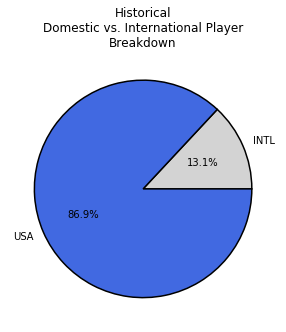

There is a total of 16895 American-born players & 
2536 Foreign-born players in MLB history.


In [4]:
#Remove players where birth country is unknown

country_breakdown = baseball_data.dropna(subset=["birthCountry"])

#Group players by home or foreign born

usa_intl = country_breakdown.groupby("US_Born").count()

#Count the amount of total players in the dataset

total_players = country_breakdown["HittingStats_playerID"].count()

intl_count = usa_intl["HittingStats_playerID"][0]
us_count = usa_intl["HittingStats_playerID"][1]


#Grab the labels for pie chart

country_pie_labels = usa_intl.index

#Choosing colors

colors = ["lightgray", "royalblue"]

#Choosing size

plt.figure(figsize = (5,5))

#Plotting pie chart

plt.pie(usa_intl["HittingStats_playerID"], labels = country_pie_labels, colors = colors, autopct = "%1.1f%%",
       wedgeprops = {"edgecolor" : "black", "linewidth" : 1.5})
plt.title("Historical\nDomestic vs. International Player\nBreakdown")
plt.show()

#Showing how many players are in the dataset

intl_count = usa_intl["HittingStats_playerID"][0]
us_count = usa_intl["HittingStats_playerID"][1]


print(f"There is a total of {us_count} American-born players & \n{intl_count} Foreign-born players in MLB history.")


In [5]:
#Checking to see if there are any players with unknown debut years

country_breakdown.count()


#Removing players with unknown birth year or birth country

baseball_data_drop_debuts = baseball_data.dropna(subset=["birthCountry","Debut Year"])

#Splitting players into domestic and foreign before grouping

domestic_players = baseball_data_drop_debuts.loc[baseball_data_drop_debuts["US_Born"] == "USA"]

foreign_players = baseball_data_drop_debuts.loc[baseball_data_drop_debuts["US_Born"] != "USA"]

#Grouping players by decade they debuted and counting them

grouped_domestic = domestic_players.groupby("Decade Debut")["HittingStats_playerID"].count()

grouped_foreign = foreign_players.groupby("Decade Debut")["HittingStats_playerID"].count()

#Finding domestic and international player percentage breakdown for each decade

US_PCT = round((grouped_domestic / (grouped_domestic + grouped_foreign) * 100),2)

INTL_PCT = round((grouped_foreign / (grouped_domestic + grouped_foreign) * 100),2)


decade_df = pd.DataFrame({"US Player Percentage" : US_PCT,
                         "International Player Percentage" : INTL_PCT})

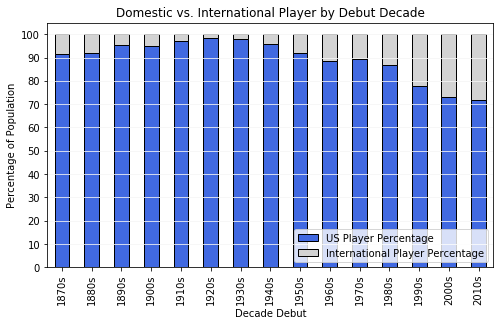

In [6]:
#Creating a bar chart for players by decade

colors = ["royalblue", "lightgray"]

decade_bar_chart = decade_df.plot(kind = "bar", color = colors, edgecolor = "black", stacked = True, figsize = (8, 4.5))
plt.title("Domestic vs. International Player by Debut Decade")
plt.xlabel("Decade Debut")
plt.ylabel("Percentage of Population")
plt.yticks(np.arange(0, 110, step=10))
plt.grid(color = "whitesmoke", linestyle = "-", axis = "y")
plt.legend(loc = "lower right")

plt.show()

In [7]:
#Using previously named country_breakdown to get rid of players with null values for birthCountry

#Getting only foreign born players

foreign_players_list = country_breakdown.loc[country_breakdown["US_Born"] != "USA"]

In [8]:
#Obtaining country list

country_group = foreign_players_list.groupby("birthCountry")

country_group_list = country_group["HittingStats_playerID"].count()

print(country_group_list)

birthCountry
Afghanistan         1
American Samoa      1
Aruba               5
At Sea              1
Australia          31
Austria             4
Bahamas             6
Belgium             1
Belize              1
Brazil              5
CAN               254
China               1
Colombia           24
Cuba              210
Curacao            14
Czech Republic      4
D.R.              757
Denmark             1
Finland             1
France              7
Germany            42
Greece              1
Guam                2
Honduras            2
Hong Kong           1
Indonesia           1
Ireland            47
Italy               7
Jamaica             4
Japan              67
Latvia              1
Lithuania           1
Mexico            129
Netherlands        12
Nicaragua          15
Norway              3
P.R.              267
Panama             63
Peru                1
Philippines         1
Poland              5
Portugal            1
Russia              9
Saudi Arabia        2
Singapore          

In [9]:
#Too many countries to make a decent looking bar graph. Going to limit them to ten or more players

shortened_country_list = country_group_list.loc[country_group_list >= 10]

print(shortened_country_list)

birthCountry
Australia          31
CAN               254
Colombia           24
Cuba              210
Curacao            14
D.R.              757
Germany            42
Ireland            47
Japan              67
Mexico            129
Netherlands        12
Nicaragua          15
P.R.              267
Panama             63
South Korea        23
Taiwan             16
United Kingdom     49
V.I.               14
Venezuela         407
Name: HittingStats_playerID, dtype: int64


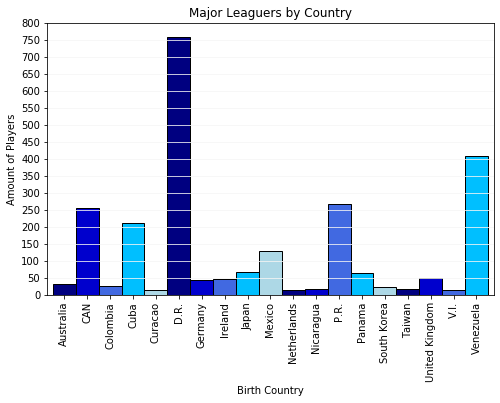

In [10]:
#Creating a bar graph for players by country

colors = ["navy", "mediumblue", "royalblue", "deepskyblue", "lightblue"]

shortened_country_list.plot(kind = "bar", width = 1, color = colors, edgecolor = "black", figsize = (8,5))
plt.title("Major Leaguers by Country")
plt.xlabel("Birth Country")
plt.ylabel("Amount of Players")
plt.yticks(np.arange(0,850, step = 50))
plt.grid(color = "whitesmoke", linestyle = "-", axis = "y")
plt.show()

In [11]:
#Separate foreign players into position players and pitchers

foreign_pitchers = foreign_players.loc[foreign_players["Pitcher_Pos"] == "Pitcher"]

foreign_pos_players = foreign_players.loc[foreign_players["Pitcher_Pos"] == "Position Player"]

#Grouping players by country and position player vs. pitcher

grouped_foreign_pitchers = foreign_pitchers.groupby("birthCountry")["HittingStats_playerID"].count()

grouped_foreign_pos_players = foreign_pos_players.groupby("birthCountry")["HittingStats_playerID"].count()

#Finding positional percentage breakdown for each country

foreign_pitcher_pct = round((grouped_foreign_pitchers / (grouped_foreign_pitchers + grouped_foreign_pos_players) * 100),2)

foreign_pos_players_pct = round((grouped_foreign_pos_players / (grouped_foreign_pitchers + grouped_foreign_pos_players) * 100),2)

foreign_pos_df = pd.DataFrame({"Pitcher Percentage" : foreign_pitcher_pct,
                         "Position Player Percentage" : foreign_pos_players_pct,
                              "Total" : country_group_list})

shortened_foreign_pos_df = foreign_pos_df.loc[foreign_pos_df["Total"] >= 10]

final_shortened_foreign_pos_df = shortened_foreign_pos_df[["Pitcher Percentage", "Position Player Percentage"]]

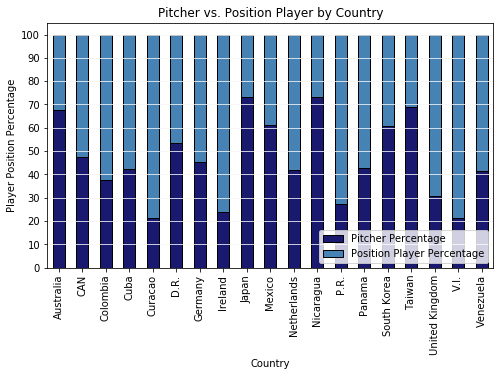

In [12]:
colors = ["midnightblue", "steelblue"]

foreign_pos_bar_chart = final_shortened_foreign_pos_df.plot(kind = "bar", color = colors, edgecolor = "black", stacked = True, figsize = (8, 4.5))
plt.title("Pitcher vs. Position Player by Country")
plt.xlabel("Country")
plt.ylabel("Player Position Percentage")
plt.yticks(np.arange(0, 110, step=10))
plt.grid(color = "whitesmoke", linestyle = "-", axis = "y")
plt.legend(loc = "lower right")

plt.show()

In [13]:
#Remove US players where birth region is unknown

region_breakdown = baseball_data.dropna(subset=["US Region"])

#Obtaining region list

region_group = region_breakdown.groupby("US Region")

region_group_list = region_group["HittingStats_playerID"].count()

print(region_group_list)

US Region
East North Central    3117
East South Central    1136
Mid-Atlantic          3057
Mountain               398
New England           1095
Pacific               2690
South Atlantic        2415
West North Central    1375
West South Central    1612
Name: HittingStats_playerID, dtype: int64


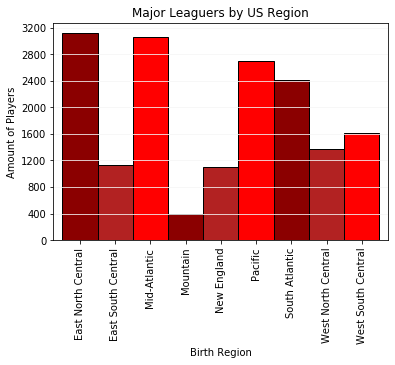

In [14]:
#Creating a bar graph for players by region

colors = ["darkred", "firebrick", "red"]


region_group_list.plot(kind = "bar", color = colors, width = 1, edgecolor = "black", figsize = (6,4))
plt.title("Major Leaguers by US Region")
plt.xlabel("Birth Region")
plt.ylabel("Amount of Players")
plt.yticks(np.arange(0,3600, step = 400))
plt.grid(color = "whitesmoke", linestyle = "-", axis = "y")
plt.show()

In [32]:
#Separate domestic players into position players and pitchers

domestic_pitchers = domestic_players.loc[domestic_players["Pitcher_Pos"] == "Pitcher"]

domestic_pos_players = domestic_players.loc[domestic_players["Pitcher_Pos"] == "Position Player"]

#Grouping players by region and position player vs. pitcher

grouped_domestic_pitchers = domestic_pitchers.groupby("US Region")["HittingStats_playerID"].count()

grouped_domestic_pos_players = domestic_pos_players.groupby("US Region")["HittingStats_playerID"].count()

#Finding positional percentage breakdown for each region

domestic_pitcher_pct = round((grouped_domestic_pitchers / (grouped_domestic_pitchers + grouped_domestic_pos_players) * 100),2)

domestic_pos_players_pct = round((grouped_domestic_pos_players / (grouped_domestic_pitchers + grouped_domestic_pos_players) * 100),2)

domestic_pos_df = pd.DataFrame({"Pitcher Percentage" : domestic_pitcher_pct,
                         "Position Player Percentage" : domestic_pos_players_pct,
                              "Total" : region_group_list})

final_domestic_pos_df = domestic_pos_df[["Pitcher Percentage", "Position Player Percentage"]]

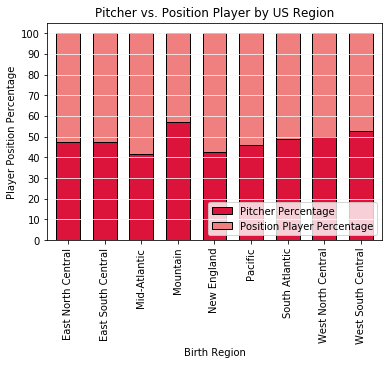

In [43]:
colors = ["crimson", "lightcoral"]

foreign_pos_bar_chart = final_domestic_pos_df.plot(kind = "bar", color = colors, width = .65, edgecolor = "black", stacked = True, figsize = (6, 4))
plt.title("Pitcher vs. Position Player by US Region")
plt.xlabel("Birth Region")
plt.ylabel("Player Position Percentage")
plt.yticks(np.arange(0, 110, step=10))
plt.grid(color = "whitesmoke", linestyle = "-", axis = "y")
plt.legend(loc = "lower right")

plt.show()